<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/ARIMA_GRID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PACKAGES INSTALLING*

In [83]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*IMPORT PACKAES*

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

*DATA LOADING*

In [85]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

*GROUPING THE DATA AND FILLING THE EMPTY VALUES BY MEDIAN*

In [86]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

Sales
Ship Date          
2014-01-01  149.950
2014-02-01  112.411
2014-03-01  483.546
2014-04-01  680.252
2014-05-01  504.828
2014-06-01  656.066
2014-07-01  504.586
2014-08-01  884.666
2014-09-01  947.648
2014-10-01  672.993

*HERE THE PLOT*

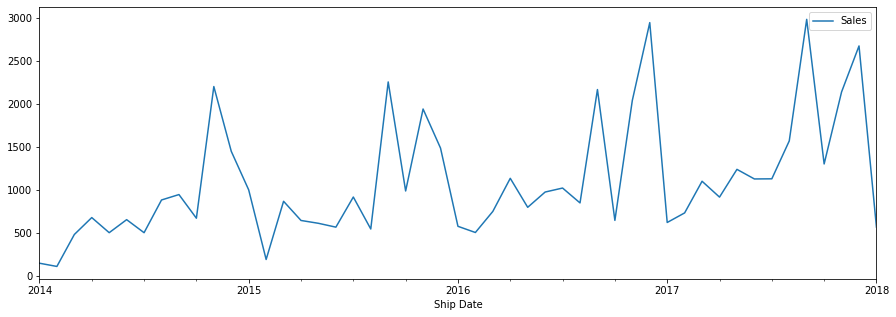

In [87]:
data1.plot(figsize=(15,5))
plt.show()

*INTIALING THE HYPER PARAMETERS*

In [88]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [89]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

*APPLYING GRID SEARCH TO FIND BETTER HYPERPARAMETERS*

In [90]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(data1, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
343.9431159320116
(1, 1, 1)
(1, 1, 0, 12)


*HERE THE MODEL BULIDING AND FITTING*

In [91]:
model = sm.tsa.statespace.SARIMAX(data1, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results = model.fit()

In [92]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -167.972
Date:                            Mon, 13 Jun 2022   AIC                            343.943
Time:                                    09:21:55   BIC                            348.485
Sample:                                01-01-2014   HQIC                           345.085
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4102      0.277     -1.482      0.138      -0.953       0.132
ma.L1         -0.9987     11.014     -0.091      0.928     -22.585      20.587
ar.S.L12      -0.6179      0.207     -2.985      0.003      -1.024      -0.212
sigma2      1.171e+05   1.28e+06      0.092      0.927   -2.38e+06    2.62e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.91
Prob(Q):                               nan   Prob(JB):                         0.05
Heteroskedasticity (H):               3.58   Skew:                             1.04
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

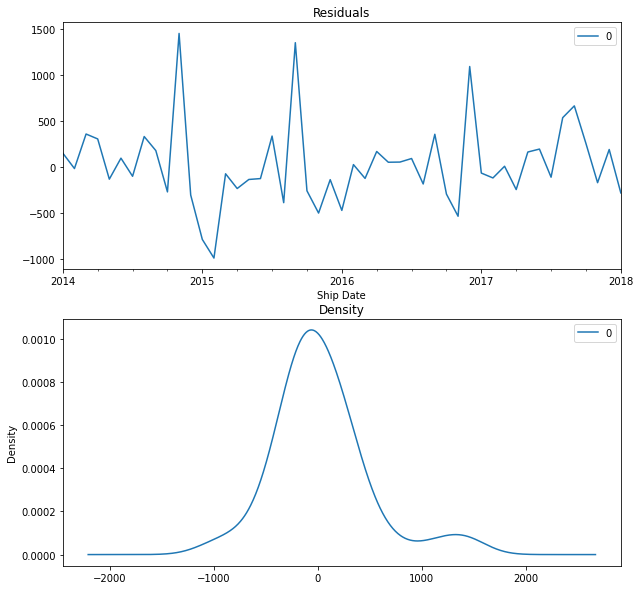

In [93]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(2,1,figsize=(10,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


*HERE THE PREDICTIONS*

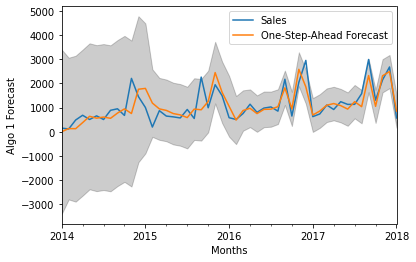

In [94]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

In [95]:
arr = data1['Sales'].values
ac = pred.predicted_mean.values

In [96]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax                   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})
forecast_accuracy(ac,arr)

{'corr': 0.7698971468478788,
 'mae': 315.58807130308116,
 'mape': 0.38912618130558585,
 'me': -27.205245793859433,
 'minmax': 0.25904228591034606,
 'mpe': 0.11979368649660872,
 'rmse': 449.6731092050149}

In [97]:
data2 = data1.copy()
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= data1.columns)
data2 = pd.concat([data2, future_prediction])

In [98]:
data2

Sales
2014-01-01  149.950
2014-02-01  112.411
2014-03-01  483.546
2014-04-01  680.252
2014-05-01  504.828
...             ...
2018-08-01      NaN
2018-09-01      NaN
2018-10-01      NaN
2018-11-01      NaN
2018-12-01      NaN

[61 rows x 1 columns]

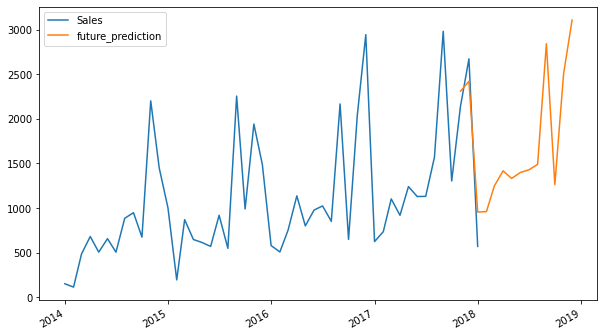

In [99]:
data2['future_prediction']=results.predict(start=46, end=60 ,dynamic=True)
data2[['Sales','future_prediction']].plot(figsize=(10, 6))
plt.show()

In [100]:
data2

Sales  future_prediction
2014-01-01  149.950                NaN
2014-02-01  112.411                NaN
2014-03-01  483.546                NaN
2014-04-01  680.252                NaN
2014-05-01  504.828                NaN
...             ...                ...
2018-08-01      NaN        1489.907729
2018-09-01      NaN        2843.574653
2018-10-01      NaN        1262.185676
2018-11-01      NaN        2508.538856
2018-12-01      NaN        3109.811375

[61 rows x 2 columns]